# Procesamiento de Lenguaje Natural

El procesamiento de lenguaje natural es el área que analiza las interacciones entre sistemas computacionales y los lenguajes humanos. Se utilizan fuertemente métodos de aprendizaje de máquinas para solucionar los problemas.

In [39]:
import pandas as pd
import sklearn.feature_extraction
import sklearn.model_selection
import sklearn.naive_bayes
import numpy as np
import matplotlib.pyplot as plt

In [12]:
# Generamos unos ejemplos de juguete para diagnósticos urgentes (1) y no-urgentes (0).

urg_text = [
    "fractura de cadera con dolor",
    "dolor de pie por fractura",
    "pericoronaritis en 4.8 y 3.8 con dolor",
    "fractura coronaria COMPLICADA en diente 1.1-2.1 con dolor",
    "dolor fulgurante en diente 4.6 y dolor opresivo en diente 1.1",
    "Fractura de húmero y peroné",
    
    "Hipertensión-arterial y enfermedad renal crónica",
    "periodontitis crónica localizada en diente 4.4 y diente 3.1",
    "Enfermedad pulmonar obstructiva crónica",
    "amalgama desajustada y periodontitis crónica diente 3.5",
    "presencia de abundante sarro en diente 6.3 con periodontitis crónica",
    "diabetes Melitus y enfermedad renal crónica"
]
urg_label = [
    1,
    1,
    1,
    1,
    1,
    1,
    
    0,
    0,
    0,
    0,
    0,
    0
]

## Preprocesamiento

In [13]:
def preprocessor(x):
    """
    Esta función recibe un string y retorna un string procesado.
    """
    normalized_x = x.lower()
    return normalized_x

La tokenización es el proceso de separar cadenas de caracteres en secciones más pequeñas, como palabras u oraciones.

In [14]:
def tokenizer(x):
    """
    Esta función recibe un string y retorna una lista de tokens.
    """
    tokenized_x = x.split(" ")
    return tokenized_x

In [15]:
cv = sklearn.feature_extraction.text.CountVectorizer( # Con esta clase podemos crear un vectorizador 
                                                      # que convierte nuestros documentos en bolsas de palabras.
    preprocessor=preprocessor, # Utilizamos nuestra función para preprocesar los string.
    tokenizer=tokenizer # Utilzamos nuestra función para tokenizar los string.
)
features = cv.fit_transform(urg_text) # Entrenamos nuestro vectorizados y transformamos nuestros documentos en bolsas de palabras.

El vocabulario son todas las palabras distintas presentes en nuestra colección de documentos (corpus).

In [16]:
cv.vocabulary_ # Este es el vocabulario de nuestroc corpus.

{'fractura': 23,
 'de': 16,
 'cadera': 11,
 'con': 13,
 'dolor': 20,
 'pie': 34,
 'por': 35,
 'pericoronaritis': 31,
 'en': 21,
 '4.8': 7,
 'y': 40,
 '3.8': 4,
 'coronaria': 14,
 'complicada': 12,
 'diente': 19,
 '1.1-2.1': 1,
 'fulgurante': 24,
 '4.6': 6,
 'opresivo': 30,
 '1.1': 0,
 'húmero': 26,
 'peroné': 33,
 'hipertensión-arterial': 25,
 'enfermedad': 22,
 'renal': 38,
 'crónica': 15,
 'periodontitis': 32,
 'localizada': 27,
 '4.4': 5,
 '3.1': 2,
 'pulmonar': 37,
 'obstructiva': 29,
 'amalgama': 10,
 'desajustada': 17,
 '3.5': 3,
 'presencia': 36,
 'abundante': 9,
 'sarro': 39,
 '6.3': 8,
 'diabetes': 18,
 'melitus': 28}

### Actividad 1
Las stopwords son palabras que no aportan semántica a las oraciones y es una práctica habitual eliminarlas del corpus. Además, normalmente se eliminan de los corpora los signos de puntuación para disminuir el tamaño del vocabulario.

**Programa la función preprocessor() para que elimine stopwords y caracteres no alfabéticos.**

In [17]:
features.shape # El tamaño de nuestra matriz de bolsas de palabras es (<número de documentos>, <tamaño del vocabulario>)

(12, 41)

In [18]:
# Convertimos nuestra matriz de bolsas de palabras a pd.DataFrame
data = pd.DataFrame(
    features.todense(),
    columns=sorted(cv.vocabulary_)
)
data["label"] = urg_label
data["text"] = urg_text

In [19]:
data

,1.1,1.1-2.1,3.1,3.5,3.8,4.4,4.6,4.8,6.3,abundante,...,peroné,pie,por,presencia,pulmonar,renal,sarro,y,label,text
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,fractura de cadera con dolor
1,0,0,0,0,0,0,0,0,0,0,...,0,1,1,0,0,0,0,0,1,dolor de pie por fractura
2,0,0,0,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,1,1,pericoronaritis en 4.8 y 3.8 con dolor
3,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,fractura coronaria COMPLICADA en diente 1.1-2....
4,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,1,dolor fulgurante en diente 4.6 y dolor opresiv...
5,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,1,Fractura de húmero y peroné
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,Hipertensión-arterial y enfermedad renal crónica
7,0,0,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,periodontitis crónica localizada en diente 4.4...
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,Enfermedad pulmonar obstructiva crónica
9,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,amalgama desajustada y periodontitis crónica d...


Tener una representación vectorial nos permite realizar el entrenamiento de modelos de aprendizaje de máquinas, como también tener una representación geométrica de nuestros documentos. Veamos cómo se comportan nuestros documentos al graficarlos sobre 2 componentes (palabras).

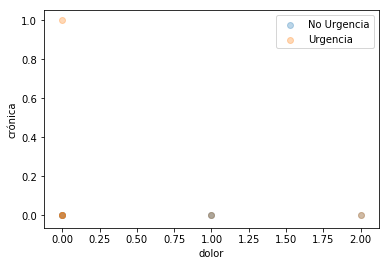

In [25]:
# Seleccionamos para graficar las palabras "dolor" y "crónica" para graficar nuestros documentos.

plt.scatter(
    data[data["label"] == 0]["diente"],
    data[data["label"] == 0]["pie"],
    label="No Urgencia",
    alpha=0.3
)
plt.scatter(
    data[data["label"] == 1]["diente"],
    data[data["label"] == 1]["pie"],
    label="Urgencia",
    alpha=0.3
)
plt.xlabel("dolor")
plt.ylabel("crónica")
plt.legend()

### Actividad 2
Al contrario de las stopwords, existen palabras que nos aportan más información en nuestro corpus.

**Al graficar, ¿qué palabras producen una mayor separación entre clases?**

Respuesta:


### Actividad 3
La bolsa de palabras no es el único método para realizar una vectorización de documentos.

**Implementa otro método de vectorización**

In [29]:
# TODO: Vectorización de documentos utilizando un método distinto al de bolsa de palabras.
# HINT:
t = sklearn.feature_extraction.text.TfidfVectorizer()

## Modelamiento

In [26]:
nb = sklearn.naive_bayes.MultinomialNB() # Instanciamos un algoritmo de Naïve Bayes.
nb.fit( # Entrenamos un modelo de Naïve Bayes.
    features,
    urg_label
)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

Al entrenar un modelo de Naïve Bayes podemos obtener las palabras que mayor aportan a la decisión de clasificación, estas son las 10 con mayor aporte.

In [27]:
pd.DataFrame(list(zip(sorted(cv.vocabulary_),nb.coef_[0]))).sort_values(1,ascending=False).head(10)

,0,1
20,dolor,-2.460809
23,fractura,-2.797281
21,en,-2.797281
13,con,-3.020425
19,diente,-3.020425
16,de,-3.020425
40,y,-3.020425
7,4.8,-3.713572
4,3.8,-3.713572
35,por,-3.713572


### Actividad 3
Naïve Bayes no es el único algoritmo para entrenar un modelo de clasificación.

**Entrena otro modelo de clasificación**

In [30]:
# TODO: Entrenar un modelo de clasificación utilizando un algoritmo distinto a Naïve Bayes


## Clasificación de Especialidades

Importamos un conjunto de datos de texto libre que contiene una serie de diagnósticos y a la especialidad a la que está asociado.

In [36]:
diagnostics = pd.read_csv("data/diagnostics.csv")

In [37]:
diagnostics.sample(5)

,diagnostic,specialty
8084,Observacion por sospecha de enfermedad o afecc...,TRAUMATOLOGIA
22751,"Catarata, no especificada",OFTALMOLOGIA
38041,Presbicia,OFTALMOLOGIA
21448,Observacion y evaluacion medica por sospecha d...,TRAUMATOLOGIA
33724,Consulta no Especificada,OFTALMOLOGIA


### Actividad 4

**Preprocesa los datos y entrena un modelo que clasifique el diagnóstico en una de las especialidades, además cr.**

In [42]:
tfidf = sklearn.feature_extraction.text.TfidfVectorizer()
diagnostics_vectorized = tfidf.fit_transform(diagnostics.diagnostic)

In [43]:
diagnostics_train, diagnostics_test, specialties_train, specialties_test = sklearn.model_selection.train_test_split(
    diagnostics_vectorized,
    diagnostics.specialty,
    test_size=0.33,
    random_state=11
)

In [45]:
nb = sklearn.naive_bayes.MultinomialNB()
nb.fit(
    diagnostics_train,
    specialties_train
)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [47]:
predictions = nb.predict(diagnostics_test)
print(sklearn.metrics.classification_report(predictions, specialties_test))

               precision    recall  f1-score   support

 OFTALMOLOGIA       0.79      0.96      0.87      5752
TRAUMATOLOGIA       0.97      0.82      0.89      8427

     accuracy                           0.88     14179
    macro avg       0.88      0.89      0.88     14179
 weighted avg       0.90      0.88      0.88     14179

